In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
sales = pd.read_csv("C:/Users/anant/OneDrive/Documents/The Developers Arena/Week7-Statistical-Business-Analysis/sales_data.csv")
customers = pd.read_csv("C:/Users/anant/OneDrive/Documents/The Developers Arena/Week7-Statistical-Business-Analysis/customer_churn.csv")

print("Sales columns:", sales.columns.tolist())
print("Customer columns:", customers.columns.tolist())


Sales columns: ['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region', 'Total_Sales']
Customer columns: ['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn']


In [6]:
# Handle missing values
sales.fillna(0, inplace=True)
customers.fillna(0, inplace=True)

# Convert Date column
sales['Date'] = pd.to_datetime(sales['Date'])

# Merge datasets
df = pd.merge(sales, customers, on='CustomerID', how='left')

print(df.head())


KeyError: 'CustomerID'

In [5]:
customers.rename(columns={'CustomerID': 'Customer_ID'}, inplace=True)


In [7]:
sales.fillna(0, inplace=True)
customers.fillna(0, inplace=True)

sales['Date'] = pd.to_datetime(sales['Date'])


In [8]:
df = pd.merge(sales, customers, on='Customer_ID', how='left')

print(df.head())


        Date     Product  Quantity  Price Customer_ID Region  Total_Sales  \
0 2024-01-01       Phone         7  37300     CUST001   East       261100   
1 2024-01-02  Headphones         4  15406     CUST002  North        61624   
2 2024-01-03       Phone         2  21746     CUST003   West        43492   
3 2024-01-04  Headphones         1  30895     CUST004   East        30895   
4 2024-01-05      Laptop         8  39835     CUST005  North       318680   

   Tenure  MonthlyCharges  TotalCharges Contract PaymentMethod  \
0     NaN             NaN           NaN      NaN           NaN   
1     NaN             NaN           NaN      NaN           NaN   
2     NaN             NaN           NaN      NaN           NaN   
3     NaN             NaN           NaN      NaN           NaN   
4     NaN             NaN           NaN      NaN           NaN   

  PaperlessBilling  SeniorCitizen  Churn  
0              NaN            NaN    NaN  
1              NaN            NaN    NaN  
2          

In [9]:
mean_sales = df['Total_Sales'].mean()
median_sales = df['Total_Sales'].median()
std_sales = df['Total_Sales'].std()

print("DESCRIPTIVE STATISTICS")
print("----------------------")
print(f"Mean Sales: {mean_sales:.2f}")
print(f"Median Sales: {median_sales:.2f}")
print(f"Standard Deviation: {std_sales:.2f}")


DESCRIPTIVE STATISTICS
----------------------
Mean Sales: 123650.48
Median Sales: 97955.50
Standard Deviation: 100161.09


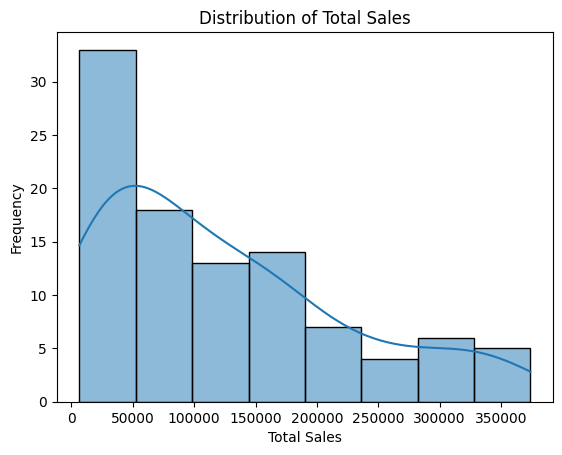

In [10]:
plt.figure()
sns.histplot(df['Total_Sales'], kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


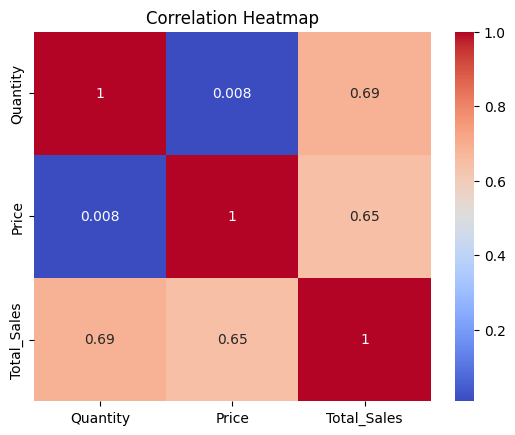

In [11]:
corr = df[['Quantity', 'Price', 'Total_Sales']].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
t1, p1 = stats.ttest_1samp(df['Total_Sales'], 20000)

print("ONE-SAMPLE T-TEST")
print(f"t-statistic: {t1:.3f}")
print(f"p-value: {p1:.4f}")


ONE-SAMPLE T-TEST
t-statistic: 10.348
p-value: 0.0000


In [13]:
churned = df[df['Churn'] == 1]['Total_Sales']
not_churned = df[df['Churn'] == 0]['Total_Sales']

t2, p2 = stats.ttest_ind(churned, not_churned, equal_var=False)

print("CHURN VS NON-CHURN T-TEST")
print(f"p-value: {p2:.4f}")


CHURN VS NON-CHURN T-TEST
p-value: nan


c:\Users\anant\OneDrive\Documents\The Developers Arena\.venv\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [14]:
groups = [
    df[df['Product'] == p]['Total_Sales']
    for p in df['Product'].unique()
]

f_stat, p3 = stats.f_oneway(*groups)

print("ANOVA TEST (Product-wise Sales)")
print(f"p-value: {p3:.4f}")


ANOVA TEST (Product-wise Sales)
p-value: 0.0934


In [15]:
sem = stats.sem(df['Total_Sales'])

ci = stats.t.interval(
    0.95,
    len(df['Total_Sales']) - 1,
    loc=mean_sales,
    scale=sem
)

print(f"95% Confidence Interval for Sales: {ci}")


95% Confidence Interval for Sales: (np.float64(103776.34767158539), np.float64(143524.6123284146))


In [16]:
X = df[['Price', 'Quantity']]
X = sm.add_constant(X)
y = df['Total_Sales']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     369.3
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           4.40e-46
Time:                        20:50:19   Log-Likelihood:                -1185.2
No. Observations:                 100   AIC:                             2376.
Df Residuals:                      97   BIC:                             2384.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+05   9668.294    -12.586      0.0

In [17]:
with open("hypothesis_tests_results.txt", "w") as f:
    f.write("Hypothesis Test Results\n")
    f.write("-----------------------\n")
    f.write(f"One-sample t-test p-value: {p1}\n")
    f.write(f"Churn vs Non-Churn p-value: {p2}\n")
    f.write(f"ANOVA p-value: {p3}\n")

print("✅ Hypothesis results saved successfully.")


✅ Hypothesis results saved successfully.
